Author: Ichsan Arsyi Putra

# Import Libraries

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Dataset

In [17]:
df_loan = pd.read_csv("loan_customer.csv")
df_loan.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [18]:
df_loan.shape

(621, 17)

In [23]:
df_loan.sample(10)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
7,LP001014,1999-05-21,6.285676e+11,Male,Yes,3+,Graduate,No,3036.0,2504.0,158000,360,30,0.0,NaN,apartment,REJECT
480,LP002527,1987-08-05,6.285605e+11,Male,Yes,2,Graduate,Yes,16525.0,1014.0,150000,360,30,1.0,NaN,studio,APPROVE
312,LP001998,1983-10-13,6.281149e+11,Male,Yes,2,Not Graduate,No,7667.0,0.0,185000,360,30,NaN,yes,studio,APPROVE
518,LP002648,1971-05-20,6.285642e+11,Male,Yes,0,Graduate,No,2130.0,6666.0,70000,180,15,1.0,NaN,apartment,REJECT
267,LP001877,1982-02-27,6.285624e+10,Male,Yes,2,Graduate,No,4708.0,1387.0,150000,360,30,1.0,NaN,apartment,APPROVE
612,LP002960,1989-10-08,6.285752e+11,Male,Yes,0,Not Graduate,No,2400.0,3800.0,110000,180,15,1.0,NaN,house,REJECT
495,LP002560,1987-05-02,6.285792e+11,Male,No,0,Not Graduate,No,2699.0,2785.0,96000,360,30,NaN,NaN,apartment,APPROVE
559,LP002789,1985-11-09,6.285610e+11,Male,Yes,0,Graduate,No,3593.0,4266.0,132000,180,15,0.0,NaN,studio,REJECT
279,LP001904,1986-01-30,6.281152e+10,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,NaN,house,APPROVE
349,LP002130,1988-11-24,6.285623e+11,Male,Yes,NaN,Not Graduate,No,3523.0,3230.0,152000,360,30,0.0,NaN,studio,REJECT


# Data Cleansing

## Handling missing values

Hapus baris data yang mengandung missing values (NaN)

In [19]:
df_loan_mv = df_loan.dropna(axis=0, subset=["dependents", "self_employed", "credit_history", "has_credit_card"], inplace=False)

In [21]:
df_loan_mv.shape

(68, 17)

## Handling duplicated data

Hapus data yang terduplikasi

In [33]:
df_loan_dd = df_loan_mv.drop_duplicates(inplace=False)

In [34]:
df_loan_dd.shape

(68, 17)

In [35]:
df_loan_dd

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
12,LP001028,1987-11-16,6.281128e+11,Male,Yes,2,Graduate,No,3073.0,8106.0,200000,360,30,1.0,no,house,APPROVE
21,LP001046,1984-06-25,6.285219e+11,Male,Yes,1,Graduate,No,5955.0,5625.0,315000,360,30,1.0,no,house,APPROVE
26,LP001068,1986-09-10,6.281377e+11,Male,Yes,0,Graduate,No,2799.0,2253.0,122000,360,30,1.0,no,apartment,APPROVE
27,LP001073,1989-02-05,6.281346e+11,Male,Yes,2,Not Graduate,No,4226.0,1040.0,110000,360,30,1.0,yes,house,APPROVE
28,LP001086,1978-11-21,6.285222e+10,Male,No,0,Not Graduate,No,1442.0,0.0,35000,360,30,1.0,no,house,REJECT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,LP002892,1983-06-24,6.285638e+11,Male,Yes,2,Graduate,No,6540.0,0.0,205000,360,30,1.0,no,apartment,APPROVE
591,LP002916,1987-04-15,6.281143e+11,Male,Yes,0,Graduate,No,2297.0,1522.0,104000,360,30,1.0,yes,house,APPROVE
599,LP002938,1987-10-28,6.281169e+11,Male,Yes,0,Graduate,Yes,16120.0,0.0,260000,360,30,1.0,no,house,APPROVE
613,LP002961,1983-02-14,6.285659e+10,Male,Yes,1,Graduate,No,3400.0,2500.0,173000,360,30,1.0,yes,apartment,APPROVE


## Handling Outlier

In [36]:
df_loan_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 12 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             68 non-null     object 
 1   birth_date          61 non-null     object 
 2   phone_number        60 non-null     float64
 3   gender              65 non-null     object 
 4   married             68 non-null     object 
 5   dependents          68 non-null     object 
 6   education           68 non-null     object 
 7   self_employed       68 non-null     object 
 8   applicant_income    67 non-null     float64
 9   coapplicant_income  68 non-null     float64
 10  loan_amount         68 non-null     int64  
 11  loan_term_month     68 non-null     int64  
 12  loan_term_year      68 non-null     int64  
 13  credit_history      68 non-null     float64
 14  has_credit_card     68 non-null     object 
 15  property_type       68 non-null     object 
 16  loan_sta

In [41]:
cats = ["loan_id", "birth_date", "gender", "married", "dependents", "education", "self_employed", "has_credit_card", "property_type", "loan_status"]
nums = ["phone_number", "applicant_income", "coapplicant_income", "loan_amount", "loan_term_month", "loan_term_year", "credit_history"]

Deteksi outliers dengan mengidentifikasi nilai minimum-makasimum dan boxplot

In [42]:
df_loan_dd[nums].describe()

,phone_number,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history
count,6.000000e+01,67.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,5.246254e+11,5466.343284,1193.132353,138264.705882,337.411765,28.117647,0.882353
std,2.206412e+11,4007.861606,1619.434653,69460.955992,68.183299,5.681942,0.324585
min,6.281124e+10,1025.000000,0.000000,25000.000000,84.000000,7.000000,0.000000
25%,6.281133e+11,3084.000000,0.000000,100000.000000,360.000000,30.000000,1.000000
50%,6.281255e+11,4342.000000,94.500000,124500.000000,360.000000,30.000000,1.000000
75%,6.285273e+11,6047.500000,1944.750000,162500.000000,360.000000,30.000000,1.000000
max,6.287787e+11,23803.000000,8106.000000,400000.000000,480.000000,40.000000,1.000000


In [43]:
df_loan_dd[cats].describe()

,loan_id,birth_date,gender,married,dependents,education,self_employed,has_credit_card,property_type,loan_status
count,68,61,65,68,68,68,68,68,68,68
unique,68,61,2,2,4,2,2,2,3,2
top,LP001028,1987-11-16,Male,Yes,0,Graduate,No,no,apartment,APPROVE
freq,1,1,53,43,39,53,53,41,26,50


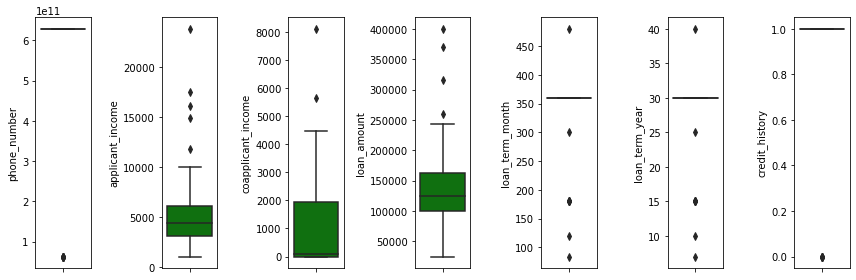

In [47]:
plt.figure(figsize=(12, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_loan_dd[nums[i]], data=df_loan_dd[nums[i]], color="green", orient="v")
    plt.tight_layout()

Menghapus data outlier dengan nilai maksimum

In [54]:
i = df_loan_dd[df_loan_dd["coapplicant_income"] == 8106].index
j = df_loan_dd[df_loan_dd["applicant_income"] == 23803].index
print(i, " ", j)

Int64Index([12], dtype='int64')   Int64Index([127], dtype='int64')


In [55]:
df_loan_o = df_loan_dd.drop(i, inplace=False)
df_loan_o = df_loan_o.drop(j, inplace=False)
df_loan_o.describe()

,phone_number,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history
count,5.800000e+01,65.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,5.210497e+11,5221.061538,1106.469697,133818.181818,336.727273,28.060606,0.878788
std,2.236076e+11,3340.759952,1392.314644,63783.988608,69.107396,5.758950,0.328875
min,6.281124e+10,1025.000000,0.000000,25000.000000,84.000000,7.000000,0.000000
25%,6.281135e+11,3095.000000,0.000000,100000.000000,360.000000,30.000000,1.000000
50%,6.281255e+11,4342.000000,94.500000,123000.000000,360.000000,30.000000,1.000000
75%,6.285258e+11,6045.000000,1902.000000,158000.000000,360.000000,30.000000,1.000000
max,6.287787e+11,17500.000000,5625.000000,400000.000000,480.000000,40.000000,1.000000


In [56]:
df_loan_o.shape

(66, 17)

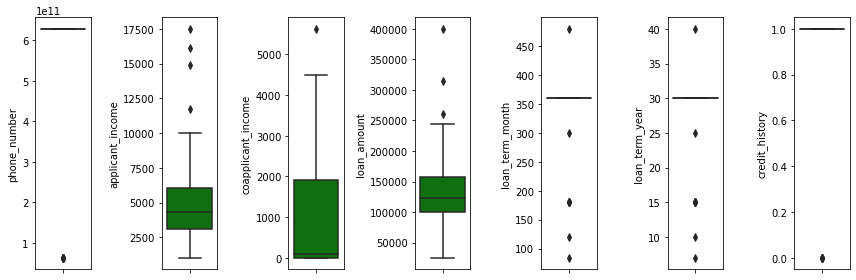

In [57]:
plt.figure(figsize=(12, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_loan_o[nums[i]], data=df_loan_o[nums[i]], color="green", orient="v")
    plt.tight_layout()

## Feature Encoding

Menambah alternatif nilai atribut loan_status APPROVE = 0 dan REJECT = 1

In [60]:
df_loan_e = df_loan_o
df_loan_e["loan_status"] = df_loan_e["loan_status"].astype('category')
df_loan_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 21 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   loan_id             66 non-null     object  
 1   birth_date          59 non-null     object  
 2   phone_number        58 non-null     float64 
 3   gender              64 non-null     object  
 4   married             66 non-null     object  
 5   dependents          66 non-null     object  
 6   education           66 non-null     object  
 7   self_employed       66 non-null     object  
 8   applicant_income    65 non-null     float64 
 9   coapplicant_income  66 non-null     float64 
 10  loan_amount         66 non-null     int64   
 11  loan_term_month     66 non-null     int64   
 12  loan_term_year      66 non-null     int64   
 13  credit_history      66 non-null     float64 
 14  has_credit_card     66 non-null     object  
 15  property_type       66 non-null     obje

In [61]:
df_loan_e["loan_status_encoded"] = df_loan_e["loan_status"].cat.codes
df_loan_e.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status,loan_status_encoded
21,LP001046,1984-06-25,6.285219e+11,Male,Yes,1,Graduate,No,5955.0,5625.0,315000,360,30,1.0,no,house,APPROVE,0
26,LP001068,1986-09-10,6.281377e+11,Male,Yes,0,Graduate,No,2799.0,2253.0,122000,360,30,1.0,no,apartment,APPROVE,0
27,LP001073,1989-02-05,6.281346e+11,Male,Yes,2,Not Graduate,No,4226.0,1040.0,110000,360,30,1.0,yes,house,APPROVE,0
28,LP001086,1978-11-21,6.285222e+10,Male,No,0,Not Graduate,No,1442.0,0.0,35000,360,30,1.0,no,house,REJECT,1
31,LP001095,1983-09-21,6.281348e+11,Male,No,0,Graduate,No,3167.0,0.0,74000,360,30,1.0,yes,house,REJECT,1


# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

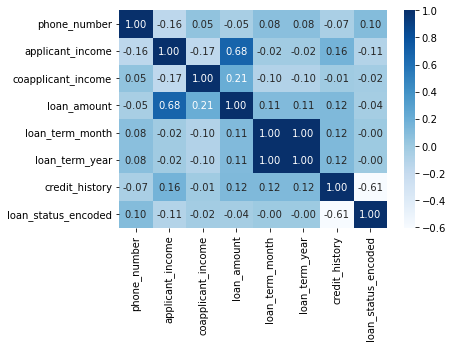

In [62]:
ma_hm = sns.heatmap(df_loan_e.corr(), cmap="Blues", annot=True, fmt=".2f")

In [78]:
proptype_m = df_loan_e[df_loan_e["gender"] == "Male"].groupby("property_type")["gender"].count().reset_index()
proptype_m

,property_type,gender
0,apartment,20
1,house,19
2,studio,13


In [119]:
proptype_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_type  3 non-null      object
 1   gender         3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [79]:
proptype_f = df_loan_e[df_loan_e["gender"] == "Female"].groupby("property_type")["gender"].count().reset_index()
proptype_f

,property_type,gender
0,apartment,6
1,house,4
2,studio,2


In [120]:
proptype_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_type  3 non-null      object
 1   gender         3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


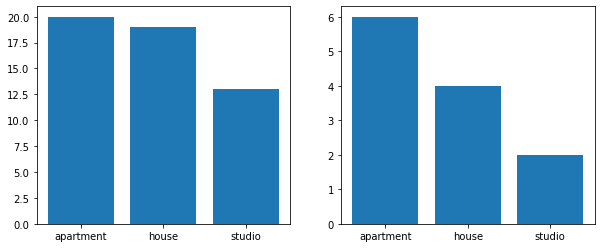

In [104]:
fig, (ax1, ax2)= plt.subplots(figsize=(10, 4), ncols=2)
_ = ax1.bar(proptype_m["property_type"], proptype_m["gender"])
_ = ax2.bar(proptype_f["property_type"], proptype_f["gender"])

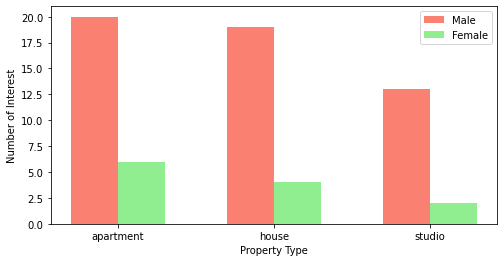

In [130]:
n_property = np.arange(3)
width = 0.3

fig, ax = plt.subplots(figsize=(8, 4))
_ = plt.xticks(n_property,
               proptype_m["property_type"],
               rotation=0)
_ = ax.bar(n_property-(0.5*width), proptype_m["gender"], width, zorder=3, color="salmon")
_ = ax.bar(n_property+(0.5*width), proptype_f["gender"], width, zorder=3, color="lightgreen")
_ = ax.legend(["Male", "Female"])
_ = ax.set(xlabel="Property Type", ylabel="Number of Interest")
plt.savefig("graphMinatJenisPropertiPerGender.png", dpi=300, orientation="landscape", format="png", transparent=True)

#### Berdasarkan jenis kelamin, peminat jasa pinjaman mayoritas adalah nasabah laki-laki. Jika dilihat dari jenis properti yang diminati (asumsi: pinjaman untuk properti), apartemen menempati posisi teratas kemudian diikuti oleh house dan studio.

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam 

In [126]:
loandur_married = df_loan_e[df_loan_e["married"] == "Yes"]
loandur_married = loandur_married.groupby("loan_term_year")["married"].count().reset_index()
loandur_married

,loan_term_year,married
0,7,1
1,10,1
2,15,5
3,30,34


In [128]:
loandur_unmarried = df_loan_e[df_loan_e["married"] == "No"]
loandur_unmarried = loandur_married.groupby("loan_term_year")["married"].count().reset_index()
loandur_unmarried

,loan_term_year,married
0,7,1
1,10,1
2,15,1
3,30,1


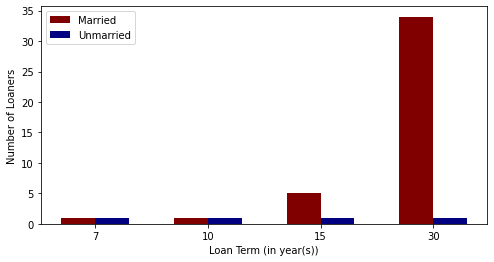

In [131]:
n_loan_term = np.arange(4)
width = 0.3

fig, ax = plt.subplots(figsize=(8, 4))
_ = plt.xticks(n_loan_term,
               loandur_married["loan_term_year"],
               rotation=0)
_ = ax.bar(n_loan_term-(0.5*width), loandur_married["married"], width, zorder=3, color="maroon")
_ = ax.bar(n_loan_term+(0.5*width), loandur_unmarried["married"], width, zorder=3, color="navy")
_ = ax.legend(["Married", "Unmarried"])
_ = ax.set(xlabel="Loan Term (in year(s))", ylabel="Number of Loaners")
plt.savefig("graphDurasiSewaPerStatus.png", dpi=300, orientation="landscape", format="png", transparent=True)

#### Nasabah dengan status menikah cenderung memilih tempo pinjaman yang lebih lama, yaitu 15 hingga 30 tahun jika dibandingkan dengan nasabah berstatus belum menikah. Secara keseluruhan, tempo pinjaman terfavorit adalah 30 tahun. 

## Kesimpulan

#### Berdasarkan kedua analisis di atas, dapat disimpulakan bahwa karakteristik nasabah yang mengajukan pinjaman bank yaitu:
    1. Lebih dominan laki-laki daripada perempuan.
    2. Urutan properti yang diminati dari yang paling tinggi ke rendah, yaitu apartemen, house, dan studio.
    3. Peminjam kebanyakan sudah berstatus menikah dengan jatuh tempo pinjaman mayoritas adalah 30 tahun.